# Support Vector Machine Experiments

In [1]:
from src.svr2 import MultiOutputSVR
from src.GridSearch2 import GridSearch
from data.load_data import load_monk, load_MLCup
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
path = os.getcwd()
file_train = '/data/ML-CUP22-TR.csv'
file_test = '/data/ML-CUP22-TS.csv'

labels_train = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','y1','y2']
labels_test = ['x1','x2','x3','x4','x5','x6','x7','x8','x9']

X, y = load_MLCup(path + file_train, labels_train)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

X_blind_test = load_MLCup(path + file_test, labels_test)

In [3]:
svr_rbf = MultiOutputSVR(n_outputs = 2, kernel = 'rbf')

params_grid = {
    "C" : [50, 75, 100, 500],
    "epsilon" : [0.001, 0.01, 0.1],
    "gamma" : [0.5, 0.75, 1],
    "max_iter" : [10, 50, 100],
    "tolerance" : [0.0001, 0.001, 0.01]
}

grid_svr_rbf = GridSearch(svr_rbf)
grid_svr_rbf.fit(X_train, y_train, params_grid, n_folds = 5, parallel = True, verbose = False)
print('*' * 30)
grid_svr_rbf.print_grid_results(n_results = 10)

Grid search of 324 combinations.
Parallelisation activated


Parameters of best model, evaluated on mean validation error: {'C': 100, 'epsilon': 0.001, 'gamma': 0.5, 'max_iter': 50, 'tolerance': 0.01}
Validation error on 5 folds for best model: [2.0213632019632244, 2.080123596047085, 2.1158939370093903, 1.953463517514092, 1.9151354748265508]
Mean validation error: 2.0171959454720687
******************************


Best parameters: {'C': 100, 'epsilon': 0.001, 'gamma': 0.5, 'max_iter': 50, 'tolerance': 0.01}
Best score: 2.0171959454720687
scores [2.0213632019632244, 2.080123596047085, 2.1158939370093903, 1.953463517514092, 1.9151354748265508]
Lowest max score: 2.067793297815921
Max score =  2.1019731575362908
Lowest max score list: [2.0598567456338346, 2.1019731575362908, 2.039383892059777, 2.0639927156705777, 2.0737599781791243]
Lowest max parameters: {'C': 50, 'epsilon': 0.1, 'gamma': 0.75, 'max_iter': 100, 'tolerance': 0.01}


Best 1 parameters: {'C': 100, 'epsilon': 0.001, 'gamma':

In [5]:
svr_poly = MultiOutputSVR(n_outputs = 2, kernel = 'polynomial')

params_grid = {
    "C" : [50, 75, 100],
    "epsilon" : [0.001, 0.01, 0.1],
    "max_iter" : [10, 50],
    "tolerance" : [0.001, 0.01],
    "degree" : [5, 7, 8, 9],
    "offset" : [0.5, 1, 2]
}

grid_svr_poly = GridSearch(svr_poly)
grid_svr_poly.fit(X_train, y_train, params_grid, n_folds = 5, parallel = True, verbose = False)
print('*' * 30)
grid_svr_poly.print_grid_results(n_results = 10)

Grid search of 432 combinations.
Parallelisation activated


Parameters of best model, evaluated on mean validation error: {'C': 75, 'epsilon': 0.01, 'max_iter': 50, 'tolerance': 0.01, 'degree': 5, 'offset': 2}
Validation error on 5 folds for best model: [2.6421850156196993, 2.5042338148873404, 2.596378774639537, 2.5590050101831516, 4.107108975302956]
Mean validation error: 2.881782318126537
******************************


Best parameters: {'C': 75, 'epsilon': 0.01, 'max_iter': 50, 'tolerance': 0.01, 'degree': 5, 'offset': 2}
Best score: 2.881782318126537
scores [2.6421850156196993, 2.5042338148873404, 2.596378774639537, 2.5590050101831516, 4.107108975302956]
Lowest max score: 2.914767896119694
Max score =  3.2241267207700655
Lowest max score list: [2.678112885482415, 2.685009950723142, 3.074127588816666, 2.91246233480618, 3.2241267207700655]
Lowest max parameters: {'C': 100, 'epsilon': 0.1, 'max_iter': 10, 'tolerance': 0.001, 'degree': 5, 'offset': 2}


Best 1 parameters: {'C': 75, '

In [8]:
if grid_svr_poly.best_score < grid_svr_rbf.best_score:
    best_kernel = grid_svr_poly
else:
    best_kernel = grid_svr_rbf

best_model = best_kernel.best_model
best_params = best_kernel.get_best_parameters()

print(f"Best kernel : {best_model.kernel}")
print(f"Best parameters : {best_params}")
print(f"Best mean validation error : {best_kernel.best_score}")

Best kernel : rbf
Best parameters : [[2.0171959454720687, {'C': 100, 'epsilon': 0.001, 'gamma': 0.5, 'max_iter': 50, 'tolerance': 0.01}, [2.0213632019632244, 2.080123596047085, 2.1158939370093903, 1.953463517514092, 1.9151354748265508]]]
Best mean validation error : 2.0171959454720687


In [11]:
# Get the best model
best_model.fit(X_train, y_train, **best_params[0][1])
y_pred = best_model.predict(X_test)

# Print the resulting errors
print(f"Train MEE : {best_model.evaluate_model(X_train, y_train, 'mee')}")
print(f"Test MEE : {best_model.evaluate_model(X_test, y_test, 'mee')}")

Train MEE : 1.647979329573529
Test MEE : 2.077969608853084


Text(0.5, 1.0, 'Blind test predctions')

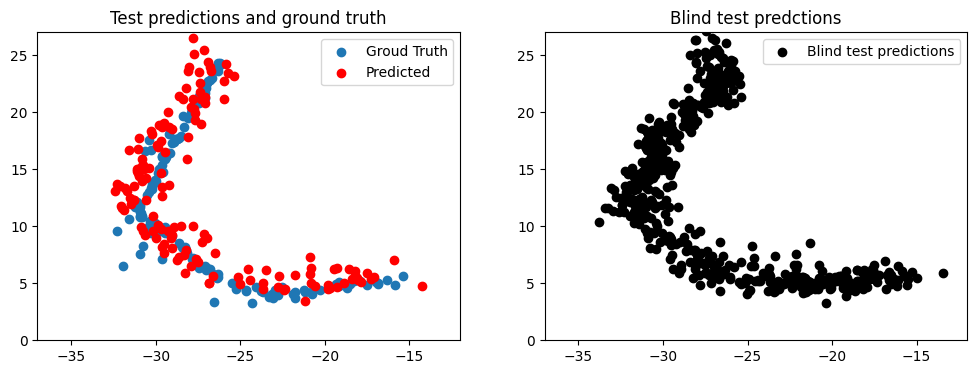

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,4))


#scatterplot of y_test and y_pred
ax1.scatter(y_test[:,1], y_test[:,0], label = 'Groud Truth')
ax1.scatter(y_pred[:,1], y_pred[:,0], color = 'red', label = 'Predicted')
ax1.legend()
ax1.set_ybound(0,27)
ax1.set_xbound(-37,-12)
ax1.set_title('Test predictions and ground truth')

y_cup = best_model.predict(X_blind_test)
ax2.scatter(y_cup[:,1], y_cup[:,0], c = 'k', label = 'Blind test predictions')
ax2.legend()
ax2.set_ybound(0,27)
ax2.set_xbound(-37,-12)
ax2.set_title('Blind test predctions')